In [1]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 52.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import underthesea

In [3]:
df = pd.read_json("ise-dsc01-train.json")

FileNotFoundError: ignored

In [ ]:
df = df.swapaxes(1,0)
df = df.reset_index()
df

In [ ]:
import re
def preprocess_context(text):
    # Thay thế dấu . bằng : nếu trước hoặc sau dấu . là số
    text = re.sub(r'(?<=\d)\.(?=\d)', ':', text)

    # Loại bỏ các ký tự '\n\n'
    text = text.replace('\n\n', ' ')

    return text

# Áp dụng hàm preprocess_context cho cột 'context'
df['context'] = df['context'].apply(preprocess_context)

In [ ]:
df.shape

In [ ]:
df.to_csv("train.csv", escapechar='\\', index = False)

In [ ]:
df["domain"].value_counts().plot(kind = "bar")

In [ ]:
df["verdict"].value_counts().plot(kind = "bar")

In [ ]:
dfSta = df
dfSta["countWords"] = df["context"].apply(lambda x: len(x.split()))
dfSta["countSentences"] = df["context"].apply(lambda x: len(underthesea.sent_tokenize(x)))
dfSta


In [ ]:
dfSta["countWords"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

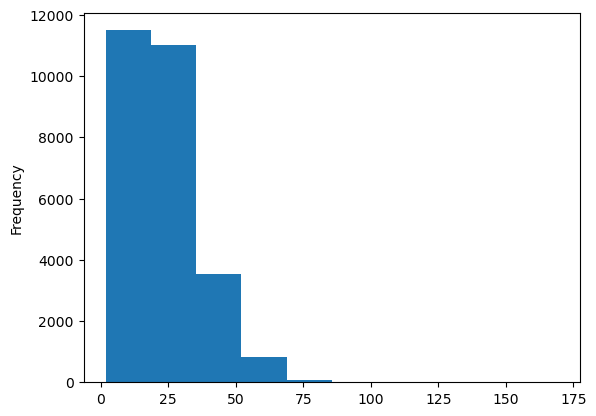

In [ ]:
dfSta["countSentences"].plot.hist()